# Interactive graph cutting in `napari`:

In [1]:
from grace import graph_from_dataframe
from grace.utils import ui

In [2]:
import mrcfile

In [12]:
import napari
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

In [10]:
# PATH = Path("/Users/arl/Documents/Turing/Data/Bea/")

PATH = "/Users/kulicna/Desktop/grace/data/mrc/"
FILE = "FoilHole_24679458_Data_24671826_24671827_20181025_1312-79674_noDW.mrc"

PATH = Path(PATH)
IMG_FILE = PATH / FILE


### Open an example image:

In [6]:
with mrcfile.open(IMG_FILE, "r") as mrc:
    img = mrc.data


(3710, 3838)

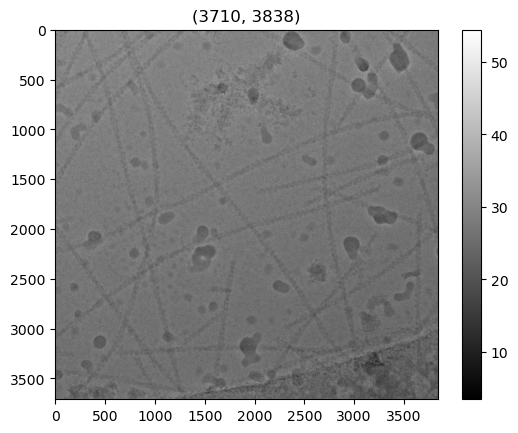

In [15]:
plt.imshow(img, cmap='binary_r')
plt.colorbar()
plt.title(img.shape)
plt.show()

### Load the edges from HDF5 file:

In [5]:
HDF_FILE = PATH / "data.h5"
nodes = pd.read_hdf(HDF_FILE)
nodes.head()

In [7]:
G = graph_from_dataframe(nodes)

NameError: name 'nodes' is not defined

In [8]:
points, edges = ui.graph_to_napari_layers(G)

NameError: name 'G' is not defined

In [9]:
viewer = napari.Viewer()
viewer.add_image(img)
viewer.add_shapes(edges, shape_type="line", edge_width=5, edge_color="blue")
gl = viewer.add_shapes(
    np.empty((0, 2, 2)), 
    shape_type="line", 
    edge_color="green", 
    edge_width=2, 
    name="good"
)
bl = viewer.add_shapes(
    np.empty((0, 2, 2)), 
    shape_type="line", 
    edge_color="red", 
    edge_width=2, 
    name="bad"
)
viewer.add_points(points, size=32)
viewer.add_labels(np.zeros(img.shape, dtype=np.int32), name="mask")
viewer.layers["mask"].brush_size = 50

# press `k` after drawing in the `mask` layer to cut the graph
@viewer.bind_key("k")
def cut(e):
    idx, good, bad = ui.cut_graph_using_mask(G, viewer.layers["mask"].data)

    good_arr = np.array(
        [points[(i, j), :] for i, j in good]
    )

    bad_arr = np.array(
        [points[(i, j), :] for i, j in bad]
    )

    gl.data = [] 
    bl.data = []
    gl.add_lines(good_arr)
    bl.add_lines(bad_arr)


NameError: name 'edges' is not defined